<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/Schrodinger/Linear%20Potential%20in%20QM%20with%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### a copy of this notebook, updated to python3 syntax: https://github.com/mholtrop/QMPython/blob/master/Linear%20Potential%20in%20QM.ipynb

# The Schrödinger Equation with a linear potential

This notebook is based on the [Solving the Schrödinger Equation Notebook](https://github.com/mholtrop/QMPython/blob/master/Solving_the_Schrodinger_Equation_Numerically.ipynb). 

The setup:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4097
a = 14

### Linear Potentials

#### Symmetric & One-sided Cases: Functional forms

For the symmetric case, we have the potential:
$$
V(x) = \lambda \left| x \right| = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ -\lambda x,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
For the one-sided case, we have the potential:
$$
V(x) = \left\{\begin{matrix} \lambda x,& \mathrm{if\ }& x\ge 0 \\ \infty,& \mathrm{if\ }& x<0 \end{matrix}  \right.
$$
We set $\lambda = 1$ when we do the calculations. Note that to get the potential to go to $\infty$, we need to set the $x$-axis to go from 0. to $a/2$ with $N/2$ points, instead of from $-a/2$ to $a/2$ with $N$ points.

#### Symmetric & One-sided Cases: Visualizing the potentials


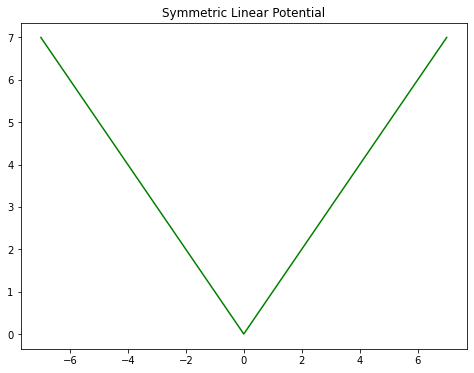

In [14]:
# This is for the symmetric linear potential
xs = np.linspace(-a/2.,a/2.,N)
Vs = np.abs(xs)

# Plot the potential
fig1 = plt.figure(figsize=(8,6))
#plt.xkcd()    # Set hand drawn looking style
#plt.xticks([]) # And remove x and y ticks.
#plt.yticks([]) # For plotting.
#plt.plot([0,0],[-2,a/2.],color="blue")  # Draw the axes in blue.
#plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(xs,Vs,color="green")           # Plot the potential in green
plt.title("Symmetric Linear Potential")
plt.savefig("Symmetric_Linear_potential.pdf")
plt.show()

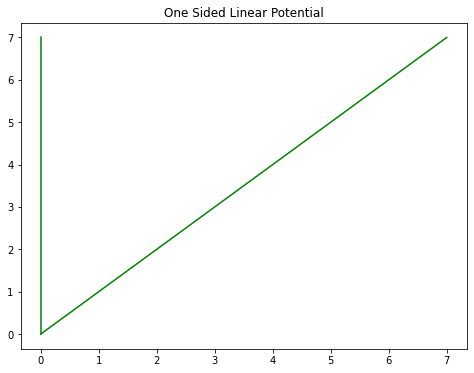

In [15]:
# This is for the one-sided linear potential
xo = np.linspace(0.,int(a/2),int(N/2))
Vo = np.abs(xo)

#
# Now plot the one-sided case
#
fig1 = plt.figure(figsize=(8,6))
#plt.xticks([])
#plt.yticks([])
plt.plot([0,0],[0,a/2.],color="green") # Plot the infinity side. 
plt.plot(xo,Vo,color="green")
plt.title("One Sided Linear Potential")
plt.savefig("Onesided_Linear_potential.pdf")
plt.show()

#### Symmetric & One-sided Cases: Solving the equations


We can now enter this into the machinery for solving the S.E. For details on how these calculations work, see the Solving the Schrödinger Equation notebook. 

For each of the potentials, we setup the Hamiltonian as a matrix, and then use a matrix solver to get the eigenvalues and eigenstates. The eigenvalues are the energy levels for this system. 

In [16]:
# This is for the Symmetric linear potential case.
hs = xs[1]-xs[0] # Should be equal to 2*np.pi/(N-1)
Mdds = 1./(hs*hs)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
Hs = -(hbar*hbar)/(2.0*m)*Mdds + np.diag(Vs) 
Es,psiTs = np.linalg.eigh(Hs) # This computes the eigen values and eigenvectors
psis = np.transpose(psiTs) 
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psis[0]*psis[0]))  # Check. Yes these are normalized already.

0.9999999999999996


In [25]:
print(Hs)
rotator = np.rot90(np.diag(np.ones(N),0))
print(rotator)
print(np.dot(np.dot(rotator,Hs),rotator)-Hs)
#print(rotator*Hs*rotator-Hs)

[[ 85605.04081633 -42799.02040816      0.         ...      0.
       0.              0.        ]
 [-42799.02040816  85605.03739836 -42799.02040816 ...      0.
       0.              0.        ]
 [     0.         -42799.02040816  85605.03398039 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...  85605.03398039
  -42799.02040816      0.        ]
 [     0.              0.              0.         ... -42799.02040816
   85605.03739836 -42799.02040816]
 [     0.              0.              0.         ...      0.
  -42799.02040816  85605.04081633]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
# This is for the One sided case.

ho = xo[1]-xo[0] # Should be equal to 2*np.pi/(N-1)
Mddo = 1./(ho*ho)*(np.diag(np.ones(int(N/2)-1),-1) -2* np.diag(np.ones(int(N/2)),0) + np.diag(np.ones(int(N/2)-1),1))
Ho = -(hbar*hbar)/(2.0*m)*Mddo + np.diag(Vo) 
Eo,psiTo = np.linalg.eigh(Ho) # This computes the eigen values and eigenvectors
psio = np.transpose(psiTo)
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psio[0]*psio[0]))  # Check. Yes these are normalized already.
# print psiT[0] # Uncomment to see the values printed for Psi_0

0.9999999999999999


#### Symmetric & One-sided Cases: Examining the solutions


We now print the energy levels. To make it more obvious that the one sided potential energy levels match every other energy level from the symmetric case, I plot the one sided ones next to the corresponding symmetric case one. As you increase the value of $N$, the agreement between these levels gets closer. These results were done with $N=4096$, which gets a bit slow on my system.

In [26]:
print("Symmetric Case  \t One-sided Case")
for n in range(12):
    if n%2==1:
        no = (n-1)/2
        #print(no)
        print("Es[{}] = {:9.4f}\t Eo[{}] ={:9.4f}".format(n,Es[n],no, Eo[int(no)]))
    else:
        print("Es[{}] = {:9.4f} ".format(n,Es[n]))

#print(len(Es))

Symmetric Case  	 One-sided Case
Es[0] =    0.8086 
Es[1] =    1.8558	 Eo[0.0] =   1.8523
Es[2] =    2.5781 
Es[3] =    3.2446	 Eo[1.0] =   3.2412
Es[4] =    3.8257 
Es[5] =    4.3817	 Eo[2.0] =   4.3783
Es[6] =    4.8923 
Es[7] =    5.3895	 Eo[3.0] =   5.3861
Es[8] =    5.8643 
Es[9] =    6.3487	 Eo[4.0] =   6.3449
Es[10] =    6.8483 
Es[11] =    7.3945	 Eo[5.0] =   7.3898


We now want to plot these wavefunctions.

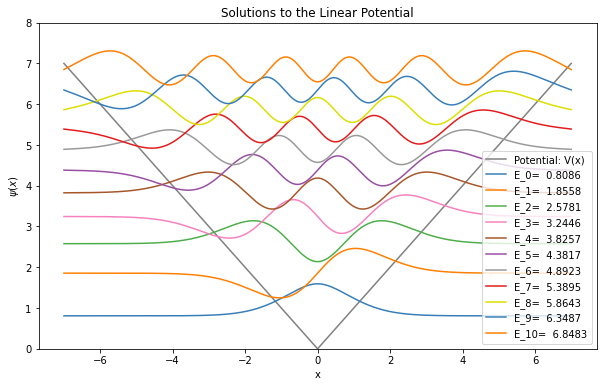

In [27]:
#find the number of wavefunctions that are bound
n_bound = len(np.argwhere(Es<np.max(Vs)))

custom_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

#plot all the bound states
plt.figure(figsize=(10,6))
plt.plot(xs,Vs,color="grey",label="Potential: V(x)")
plt.ylim((0,np.max(Vs)+1))

#now plot the wavefunctions themselves
for i in range(n_bound):
    if psis[i,N-10]<0:
        plt.plot(xs,Es[i]-np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]), color = custom_color_cycle[i % 9])
    else:
        plt.plot(xs,Es[i]+np.real(psis[i])/np.sqrt(hs),label="E_{}={:8.4f}".format(i,Es[i]), color = custom_color_cycle[i % 9])
    plt.legend(loc=4)
    plt.title("Solutions to the Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("Linear_Potential_Wavefunctions.pdf")
plt.show()

The first five energy levels for this system are then given by:

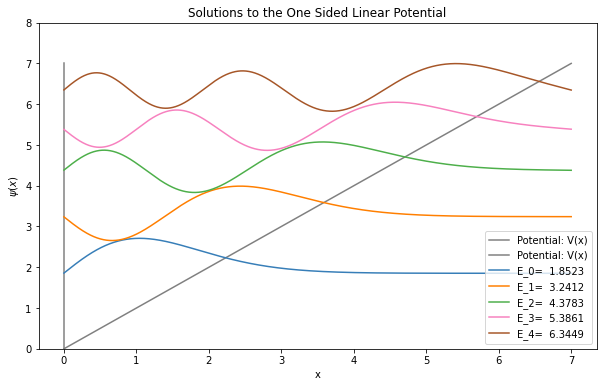

In [28]:
#find the number of wavefunctions that are bound
n_bound_one = len(np.argwhere(Eo<np.max(Vo)))

#plot all the bound states
plt.figure(figsize=(10,6))
plt.plot(xo,Vo,color="grey",label="Potential: V(x)")
plt.plot([0,0],[0,np.max(Vo)],color="grey",label="Potential: V(x)")
plt.ylim((0,np.max(Vo)+1))

for i in range(n_bound_one):
    if psio[i,int(N/2)-10]<0:
        plt.plot(xo,Eo[i]-psio[i]/np.sqrt(ho),label="E_{}={:8.4f}".format(i,Eo[i]), color = custom_color_cycle[i % 9])
    else:
        plt.plot(xo,Eo[i]+psio[i]/np.sqrt(ho),label="E_{}={:8.4f}".format(i,Eo[i]), color = custom_color_cycle[i % 9])
    plt.legend(loc = 4)
    plt.title("Solutions to the One Sided Linear Potential")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("One_Sided_Linear_Potential_Wavefunctions.pdf")
plt.show()

We see that for the wavefunctions as well, every other wavefunction of the symmetric case matches the one from the one-sided case.

#### New Potential: periodic barriers

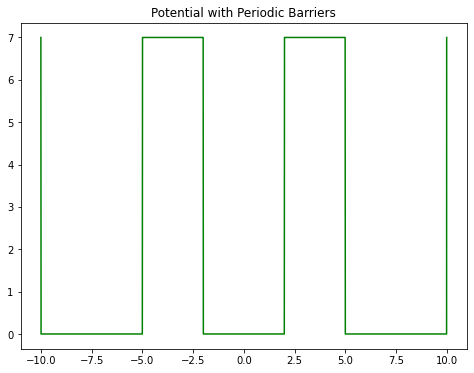

In [29]:
# This is for the symmetric linear potential
a1= 20
N1= 4097
xs = np.linspace(-int(a1/2.),int(a1/2.),N1)
Vp = np.zeros(len(xs))

Vp[0] = 7
Vp[-1] = 7

for i in range(len(xs)):
   if ( (np.abs(xs[i]) > 2) & ((np.abs(xs[i]) < 5)) ): 
     Vp[i] = 7


# Make Plots
fig1 = plt.figure(figsize=(8,6))
#plt.xkcd()    # Set hand drawn looking style
#plt.xticks([]) # And remove x and y ticks.
#plt.yticks([]) # For plotting.
#plt.plot([0,0],[-2,a/2.],color="blue")  # Draw the axes in blue.
#plt.plot([-a/2.,a/2.],[0,0],color="blue")
plt.plot(xs,Vp,color="green")           # Plot the potential in green
plt.title("Potential with Periodic Barriers")
plt.savefig("Potential_With_Periodic_Barriers.pdf")
plt.show()

In [33]:
# This is for the Symmetric linear potential case.
hp = xs[1]-xs[0] # Should be equal to 2*np.pi/(N-1)
Mddp = 1./(hp*hp)*(np.diag(np.ones(N1-1),-1) -2* np.diag(np.ones(N1),0) + np.diag(np.ones(N1-1),1))
Hp = -(hbar*hbar)/(2.0*m)*Mddp + np.diag(Vp) 
Ep,psiTp = np.linalg.eigh(Hp) # This computes the eigen values and eigenvectors
psip = np.transpose(psiTp) 
# We now have the eigen vectors as psi(i), where i is the energy level.
print(np.sum(psip[0]*psip[0]))  # Check. Yes these are normalized already.

1.0000000000000018


In [34]:
#find the number of wavefunctions that are bound
#print(np.max(Vp))
#print(len(np.argwhere( Ep < np.max(Vp) )) )

#print("Periodic Barriers")
for n in range(20):
  print("Ep[{}] = {:9.4f}".format(n,Ep[n]))

print(len(Ep))
#print(psis)

Ep[0] =    0.1773
Ep[1] =    0.1773
Ep[2] =    0.2398
Ep[3] =    0.7082
Ep[4] =    0.7082
Ep[5] =    0.9549
Ep[6] =    1.5895
Ep[7] =    1.5895
Ep[8] =    2.1310
Ep[9] =    2.8142
Ep[10] =    2.8142
Ep[11] =    3.7341
Ep[12] =    4.3664
Ep[13] =    4.3664
Ep[14] =    5.6710
Ep[15] =    6.1945
Ep[16] =    6.1948
Ep[17] =    7.3014
Ep[18] =    7.5046
Ep[19] =    7.8762
4097


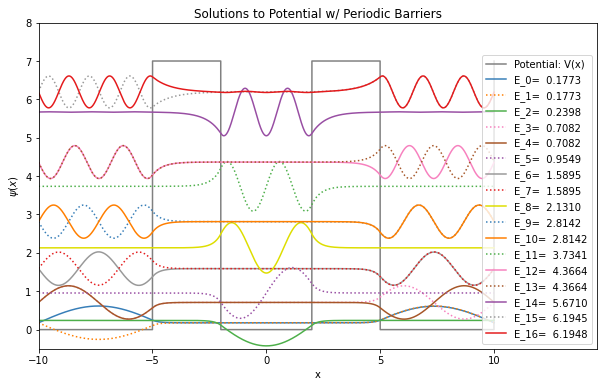

In [43]:
#find the number of wavefunctions that are bound
n_bound_periodic = len(np.argwhere( Ep < np.max(Vp) ))
#print(len(np.argwhere( Ep < np.max(Vp) )) )

#plot all the bound states
plt.figure(figsize=(10,6))
plt.plot(xs,Vp,color="grey",label="Potential: V(x)")
#plt.plot([0,0],[0,np.max(Vp)]%,color="grey",label="Potential: V(x)")
plt.ylim((-0.5,np.max(Vp)+1))
plt.xlim( (np.min(xs),np.max(xs)+4.5))
for i in range(n_bound_periodic):
    if ((i % 2) == 0):
        plt.plot(xs,Ep[i]-psip[i]/np.sqrt(hp),label="E_{}={:8.4f}".format(i,Ep[i]), color = custom_color_cycle[i % 9])
    else:
        plt.plot(xs,Ep[i]+psip[i]/np.sqrt(hp),label="E_{}={:8.4f}".format(i,Ep[i]), color = custom_color_cycle[i % 9], linestyle='dotted')
    plt.legend(loc = 4)
    plt.title("Solutions to Potential w/ Periodic Barriers")
    plt.xlabel("x")
    plt.ylabel("$\psi(x)$")
plt.savefig("Periodic_Potential_Barriers_Wavefunctions.pdf")
plt.show()

In [45]:
#test if solutions can be rotated and solved
print(psip[0])
print(np.dot(Ep[0],psiTp[0]))
print(np.dot(Hs,psiTp[0]))
print(np.dot(psiTp[0],Ep[0])-np.dot(psiTp[0],Hp))

[-8.89797383e-05 -1.77988424e-04 -2.66995606e-04 ... -2.63551128e-04
 -1.75692218e-04 -8.78318215e-05]
[-1.57759113e-05 -1.55723882e-05 -3.36447669e-10 ... -6.68942611e-12
  6.90974481e-13  6.91095459e-13]
[-3.85799820e+00 -3.71051952e+00 -3.80567417e+00 ... -1.78187076e-06
  1.78159900e-06  1.66884333e-07]
[ 1.89072100e+00  1.81783787e+00  1.86478034e+00 ...  8.72980695e-07
 -8.72969459e-07 -8.17865476e-08]


In [44]:
np.allclose(Hp @ psiTp, psiTp @ np.diag(Ep))

True